# 1. 数据预览

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline


In [2]:
user_data = pd.read_csv("./input/tianchi_fresh_comp_train_user.csv")
item_data = pd.read_csv("./input/tianchi_fresh_comp_train_item.csv")

In [3]:
user_data.head()

,user_id,item_id,behavior_type,user_geohash,item_category,time
0,10001082,285259775,1,97lk14c,4076,2014-12-08 18
1,10001082,4368907,1,NaN,5503,2014-12-12 12
2,10001082,4368907,1,NaN,5503,2014-12-12 12
3,10001082,53616768,1,NaN,9762,2014-12-02 15
4,10001082,151466952,1,NaN,5232,2014-12-12 11


In [4]:
item_data.head()

,item_id,item_geohash,item_category
0,100002303,NaN,3368
1,100003592,NaN,7995
2,100006838,NaN,12630
3,100008089,NaN,7791
4,100012750,NaN,9614


In [5]:
print(user_data.describe())
print(item_data.describe())

            user_id       item_id  behavior_type  item_category
count  2.329103e+07  2.329103e+07   2.329103e+07   2.329103e+07
mean   7.006868e+07  2.023214e+08   1.106268e+00   6.835397e+03
std    4.569072e+07  1.167440e+08   4.599087e-01   3.812873e+03
min    4.920000e+02  3.700000e+01   1.000000e+00   2.000000e+00
25%    3.019541e+07  1.014417e+08   1.000000e+00   3.690000e+03
50%    5.626942e+07  2.022430e+08   1.000000e+00   6.054000e+03
75%    1.166482e+08  3.035325e+08   1.000000e+00   1.027100e+04
max    1.424430e+08  4.045625e+08   4.000000e+00   1.408000e+04
            item_id  item_category
count  6.209180e+05  620918.000000
mean   2.004351e+08    6970.213167
std    1.191648e+08    3479.627372
min    9.580000e+02       2.000000
25%    9.357641e+07    4245.000000
50%    2.053761e+08    6890.000000
75%    3.054015e+08   10120.000000
max    4.045624e+08   14071.000000


In [6]:
total = user_data.isnull().sum().sort_values(ascending=False)
percent = (user_data.isnull().sum()/user_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])#.reset_index('user_data')
print(missing_data.head(20))

total = item_data.isnull().sum().sort_values(ascending=False)
percent = (item_data.isnull().sum()/item_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])#.reset_index('item_data')
print(missing_data.head(20))
## 数据中除了商品位置信息（item_geohash）有67.2%的缺失值，其他字段都无缺失值。

                  Total   Percent
user_geohash   15911010  0.683139
time                  0  0.000000
item_category         0  0.000000
behavior_type         0  0.000000
item_id               0  0.000000
user_id               0  0.000000
                Total   Percent
item_geohash   417508  0.672404
item_category       0  0.000000
item_id             0  0.000000


In [7]:
print('item_data 商品ID个数：',len(item_data.item_id.unique()))
print('user_data商品ID个数：',len(user_data.item_id.unique()))
item_list=item_data.item_id.unique().tolist()

item_data 商品ID个数： 422858
user_data商品ID个数： 4758484


查看用户的行为类型， 包括浏览、收藏、加购物车、购买  占比

In [8]:
print(len(user_data[user_data["behavior_type"] == 1])/len(user_data)) # 浏览
print(len(user_data[user_data["behavior_type"] == 2])/len(user_data)) # 收藏
print(len(user_data[user_data["behavior_type"] == 3])/len(user_data)) # 加购物车
print(len(user_data[user_data["behavior_type"] == 4])/len(user_data)) # 购买

0.942015996117303
0.01968530627696237
0.02831292067971069
0.009985776926023916


In [9]:
# 转换时间类型
user_data["time"] = pd.to_datetime(user_data["time"], format="%Y%m%d %H")
#print(user_data.time) # 2014-12-08 18:00:00
user_data["date"] = user_data["time"].dt.date
user_data["weekday"] = user_data["time"].dt.weekday
user_data["hour"] = user_data["time"].dt.hour
print(user_data.head())

    user_id    item_id  behavior_type user_geohash  item_category  \
0  10001082  285259775              1      97lk14c           4076   
1  10001082    4368907              1          NaN           5503   
2  10001082    4368907              1          NaN           5503   
3  10001082   53616768              1          NaN           9762   
4  10001082  151466952              1          NaN           5232   

                 time        date  weekday  hour  
0 2014-12-08 18:00:00  2014-12-08        0    18  
1 2014-12-12 12:00:00  2014-12-12        4    12  
2 2014-12-12 12:00:00  2014-12-12        4    12  
3 2014-12-02 15:00:00  2014-12-02        1    15  
4 2014-12-12 11:00:00  2014-12-12        4    11  


查user_data日期分布，从2014-11-18 00:00:00 -  2014-12-18 23:00:00

In [10]:
print(user_data.sort_values('time')['time'].drop_duplicates())

20550175   2014-11-18 00:00:00
3493635    2014-11-18 01:00:00
8302965    2014-11-18 02:00:00
13013089   2014-11-18 03:00:00
14682229   2014-11-18 04:00:00
2821132    2014-11-18 05:00:00
5092808    2014-11-18 06:00:00
15471053   2014-11-18 07:00:00
12603115   2014-11-18 08:00:00
19452032   2014-11-18 09:00:00
15019872   2014-11-18 10:00:00
19051855   2014-11-18 11:00:00
5904469    2014-11-18 12:00:00
15946541   2014-11-18 13:00:00
21836301   2014-11-18 14:00:00
19475970   2014-11-18 15:00:00
6041580    2014-11-18 16:00:00
3283250    2014-11-18 17:00:00
21763730   2014-11-18 18:00:00
20014303   2014-11-18 19:00:00
20135495   2014-11-18 20:00:00
627662     2014-11-18 21:00:00
15586223   2014-11-18 22:00:00
22172522   2014-11-18 23:00:00
19490747   2014-11-19 00:00:00
13248939   2014-11-19 01:00:00
23284362   2014-11-19 02:00:00
8735613    2014-11-19 03:00:00
2797551    2014-11-19 04:00:00
20741381   2014-11-19 05:00:00
                   ...        
19363854   2014-12-17 18:00:00
16487489

# 2.用户行为数据探索

## 2.1 查看单日用户购买数量

In [53]:
# 商品每天的购买情况 in_itemlist表示是否特指待预测商品子集的商品
#plt.rcParams['font.sans-serif'] = ['SimHei']  # 中文字体设置-黑体
# plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
#sns.set(font='SimHei')  # 解决Seaborn中文显示问题

def erveryday_buy_counts(in_itemlist=False):
    if in_itemlist == True:
        condition = user_data["item_id"].isin(item_list)
    else:
        condition = True
    #f, (ax1, ax2,ax3,ax4) = plt.subplots(4, 1, figsize=(8, 8), sharex=True)
    item_day_buy_count = user_data[(user_data.behavior_type == 4) & (condition) ][["user_id", "item_id", "date"]].drop_duplicates()#&(condition)]
    item_day_buy_count["buy_count"] = 1
    item_day_buy_count["date"]=item_day_buy_count["date"].apply(lambda x:str(x)[5:])
    item_day_buy_count=item_day_buy_count[['buy_count','date']].groupby('date').count().sort_values('date')
    
    f, ax = plt.subplots(figsize=(20, 5))
    fig=sns.barplot(x=item_day_buy_count.index,y=item_day_buy_count['buy_count'])
    #fig.set_xticklabels(ax.get_xticklabels(), rotation=90)
    #sns.barplotp('')

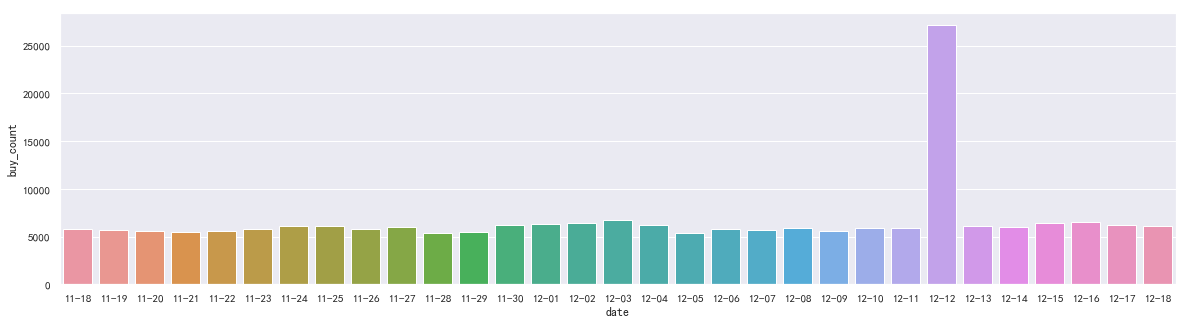

In [54]:
# 商品全集每天的购买情况
erveryday_buy_counts(in_itemlist=False)

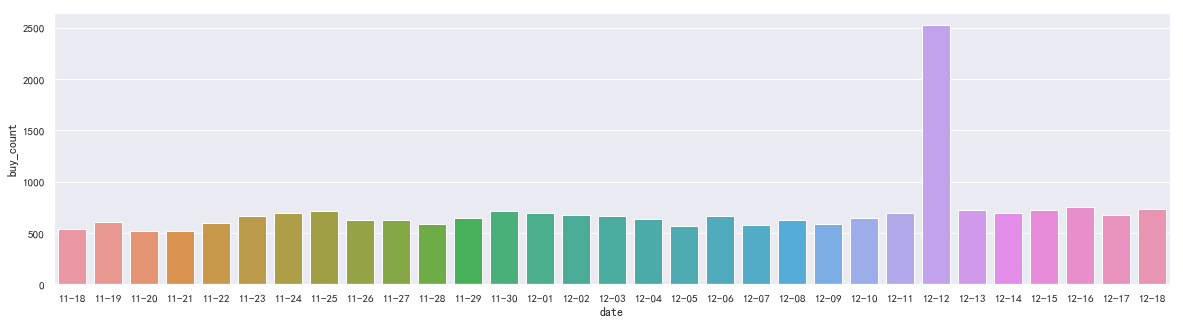

In [50]:
# 商品子集每天的购买情况
erveryday_buy_counts(in_itemlist=True)

## 2.2 查看用户星期购买分布

Text(0.5, 1.0, '购买')

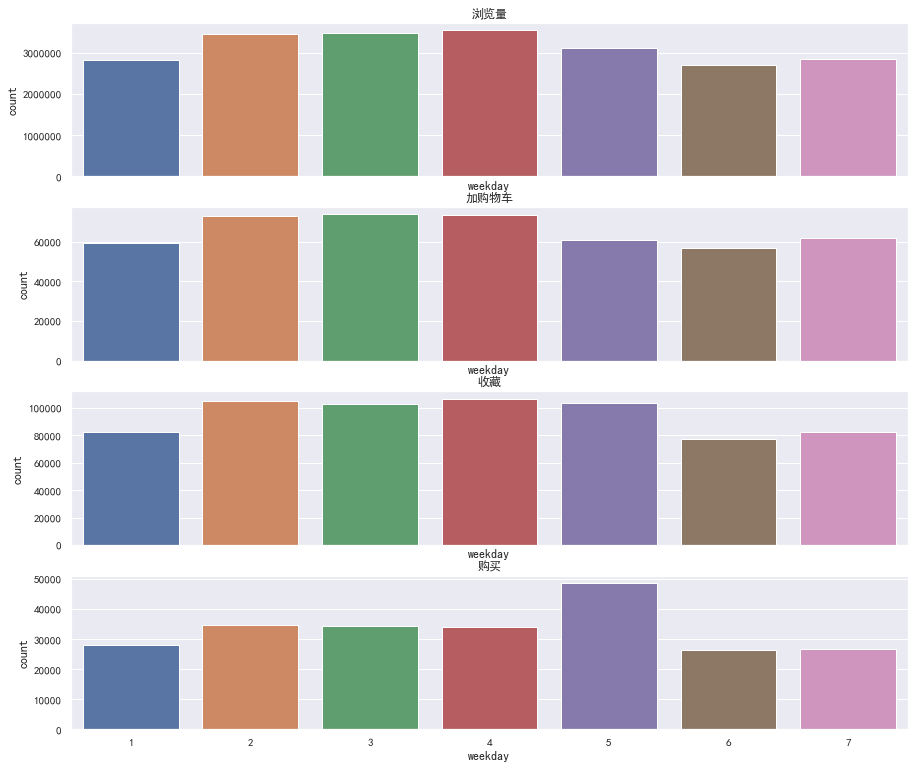

In [47]:
# 用户type操作的星期分布
def weekday_buy_counts(type, in_itemlist=False):
    if in_itemlist == True:
        condition = user_data["item_id"].isin(item_list)
    else:
        condition = True
    weekday_buy_counts = user_data[(user_data["behavior_type"] == type)&(condition)][["weekday"]]
    weekday_buy_counts["count"] = 1
    weekday_buy_counts["weekday"] = weekday_buy_counts["weekday"].apply(lambda x: x+1)
    #print(weekday_buy_counts)
    weekday_buy_counts = weekday_buy_counts.groupby("weekday", as_index=False).count().sort_values(by="count", ascending=False).reset_index(drop=True)
    return weekday_buy_counts


f, (ax1, ax2,ax3,ax4) = plt.subplots(4, 1, figsize=(15, 13), sharex=True)

# 商品全集 浏览、加购物车、收藏 和买 的星期分布图
data = weekday_buy_counts(1, False)
#print(data.head(7))
fig = sns.barplot(x="weekday", y="count", data=data,ax=ax1) 
ax1.set_title('浏览量')

data = weekday_buy_counts(2, False)
fig = sns.barplot(x="weekday", y="count", data=data,ax=ax2)
ax2.set_title('加购物车')

data = weekday_buy_counts(3, False)
fig = sns.barplot(x="weekday", y="count", data=data,ax=ax3)
ax3.set_title('收藏')
data = weekday_buy_counts(4, False)
fig = sns.barplot(x="weekday", y="count", data=data,ax=ax4)
ax4.set_title('购买')



上图展示了用户的四种行为在一个星期内每天的分布，浏览、收藏和加入购物车的分布大致相同，而星期五购买量不其他的天数多。

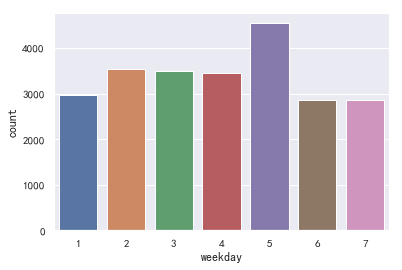

In [48]:
# 商品子集购买星期分布图
data = weekday_buy_counts(4, True)
fig = sns.barplot(x="weekday", y="count", data=data)

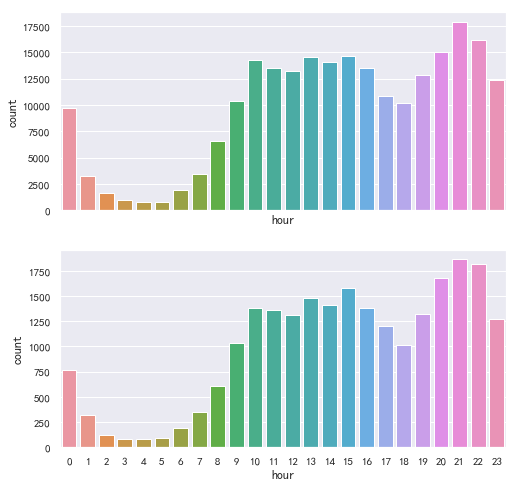

In [55]:
# 用户type操作的时间段分布
def hour_buy_counts(type, in_itemlist=False):
    if in_itemlist == True:
        condition = user_data["item_id"].isin(item_list)
    else:
        condition = True
    hour_buy_counts = user_data[(user_data["behavior_type"] == type)&(condition)][["hour"]]
    hour_buy_counts["count"] = 1
    hour_buy_counts = hour_buy_counts.groupby("hour", as_index=False).count().sort_values(by="count", ascending=False).reset_index(drop=True)
    return hour_buy_counts

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8), sharex=True)
# 商品全集购买时间段分布图
data = hour_buy_counts(4,False)
fig = sns.barplot(x="hour", y="count", data=data,ax=ax1)

# 商品子集购买时间段分布图
data = hour_buy_counts(4,True)
fig = sns.barplot(x="hour", y="count", data=data,ax=ax2)




按小时来观察用户行为的分布，用户一般在每天的19:00—23:00时间段，浏览、收藏、加入购物车的操作数量达到高峰，而购买行为则在下午和晚上够比较多。

由于数据只有行为时间的数据，所以必须通过各种行为构造新的特征。通过对数据的探索以及对购买行为的理解，可以在用户各种行为发生的次数和时间间隔等方面构造特征